In [1]:
# # np.array([[1, 2, 3], [4, 5, 6]]).reshape(0, 3, 2)
# ! unzip cr-20191220T131909Z-001.zip

In [2]:
#adding padding so that we can resize to square without losing information
from PIL import ImageOps
from PIL import Image
import os

#finally, the png images have "transparencies"
#which need to be changed into white pixels 
#(a gap in the PIL functionality that PyTorch uses)
from PIL import Image
import re

#https://stackoverflow.com/questions/44231209/resize-rectangular-image-to-square-keeping-ratio-and-fill-background-with-black/44231784
# def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
#     x, y = im.size
#     size = max(min_size, x, y)
#     new_im = Image.new('RGBA', (size, size), fill_color)
#     new_im.paste(im, (int((size - x) / 2), \
#                       int((size - y) / 2)))
#     return new_im

# for i in os.listdir\
# ("/mnt/disks/user/project/bach-images/bach2"):
#   if re.match("img\d+.png", i) \
# != None:
#     test_image = Image.open\
#     ("/mnt/disks/user/project/bach-images/bach2/" + i)
#     new_image = make_square(test_image)
#     new_image.save("/mnt/disks/user/project/bach/bach-images2/" + i)

In [3]:
%matplotlib inline

In [4]:
#get labels
import pandas as pd

label_frame = pd.read_csv("labels.txt", "\t", \
                          dtype=str, header = None, \
                          names = ["imageid", "note"])
enc = [i for i in range(len(label_frame["note"].unique()))]
dic = dict(zip(enc, label_frame["note"].unique()))
for i in enc:
    label_frame.loc[label_frame["note"]==dic[i], "note"] = i

In [5]:
label_frame[:10]
len(enc)
print(dic)

{0: 'G', 1: 'B', 2: 'A', 3: 'D', 4: 'E', 5: 'F#', 6: 'C', 7: 'C#', 8: 'G#', 9: 'E-', 10: 'B-', 11: 'F'}


In [16]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

# os.makedirs("images", exist_ok=True)
os.makedirs("images-unc", exist_ok=True)
os.makedirs("GAN-Image-Folder-Unc", exist_ok=True)




#3422 images of high quality instead of the 20000 lower quality images
dataroot = "/mnt/disks/user/project/bach/bach-images2"
workers = 4
batch_size = 56
img_size = 64 #change this to 64 to replicate model 1
channels = 1 #color channels, i change to grayscale
latent_dim = 100 #noise vector dim
ngf = 10 #generator feature dim
ndf = 10 #discriminator feature dim
n_epochs =50
lr = 0.0002 #learning rate
# Beta1 hyperparam for Adam optimizers
b1 = 0.5
b2 = 0.999
ngpu = 1
n_classes=12
sample_interval = 400
conditional = False
loss_file = "loss.txt"
model_file = "GAN-Image-Folder2"
image_file = "images"



# size_data= len(os.listdir("bach/bach-images2"))

img_shape = (channels, img_size, img_size)

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_embedding = nn.Embedding(n_classes, n_classes)

        self.model = nn.Sequential(
            nn.Linear(n_classes + int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1),
        )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), \
                          self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity


# Loss functions
adversarial_loss = torch.nn.MSELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()









transforms
loader
batch load


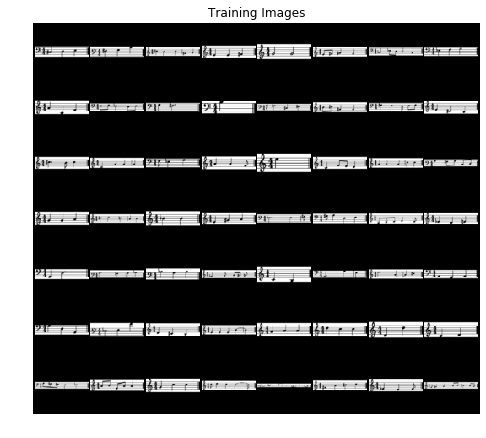

In [17]:
import re
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.utils as vutils

class Bach(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        
        #placeholder
        self.images = []
        labels = []
        for i in os.listdir(dataroot):
#               if re.match("img\d\d+.png", i)!=None:
#                 print(i)
                with Image.open(dataroot + "/"+i).convert('L')\
    as image:

                    self.images.append(np.array(image).astype\
                                       ("uint8"))
                    if conditional==True:
                        if len(label_frame[label_frame.iloc[:,0]\
                                           ==i[3:i.find(".")]])==0:
                            print("o boi", i)
                        labels.append(label_frame[label_frame.iloc\
                                                  [:,0]==i[3:i.find(".")]].\
                                      iloc[:,1:].iloc[0])
        if conditional==False:
            self.labels = Variable(torch.LongTensor(np.zeros\
                                                    (len(self.images))\
                                                    .astype("uint8").\
                                                    flatten()))
        else:
            self.labels = Variable(torch.LongTensor(np.array(labels).\
                                                    astype("uint8").\
                                                    flatten())) 
       
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        label = self.labels[idx]
        img = Image.fromarray(self.images[idx])
        
        if self.transform:
            img = self.transform(img)

        return img, label

print("transforms")
transform = transforms.Compose([
                              transforms.Grayscale(num_output_channels=1), 
                              #note that I load in grayscale
                               transforms.Resize(img_size),
                               transforms.CenterCrop(img_size),
                               transforms.ToTensor(),
                              transforms.Normalize([0.5], [0.5]) 
                           ])
dataset = Bach(transform=transform)

print("loader")
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,\
                                         shuffle=True, \
                                          num_workers = 4)
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0)\
                      else "cpu")

print("batch load")
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64],\
                                         padding=2, normalize=True).cpu(),\
                        (1,2,0)))

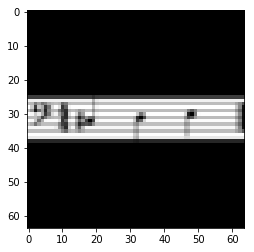

In [18]:
#one such image
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].\
                                         to(device)[:1],\
                                         padding=2, \
                                         normalize=True).cpu(),\
                        (1,2,0)))

In [19]:
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(),\
                               lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(),\
                               lr=lr, betas=(b1, b2))

FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor

def sample_image(n_row, batches_done, loss, loss_file):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal\
                             (0, 1, (n_row ** 2, latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row)\
                       for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)
    save_image\
    (gen_imgs.data, image_file+"/%d.png" % batches_done, nrow=n_row,\
     normalize=True)
    with open(loss_file, "a+") \
    as loss_file:
        loss_file.write(str(loss[0])+ "\t"+ str(loss[1]) )
        loss_file.write("\n")

In [21]:
# ----------
#  Training
# ----------

#you do not see outputs bc i commented removed it to make the notebook neater
#it was just printing out information such as loss from each epoch

n_epochs = 500

for epoch in range(0, n_epochs):

    for i, (imgs, labels) in enumerate(dataloader):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = Variable(FloatTensor(batch_size, 1).fill_(1.0),\
                         requires_grad=False)
        fake = Variable(FloatTensor(batch_size, 1).fill_(0.0),\
                        requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # ---------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = Variable(FloatTensor(np.random.normal(0, 1, \
                                                  (batch_size, latent_dim))))
        gen_labels = Variable(LongTensor(np.random.randint\
                                         (0, n_classes, batch_size)))

        # Generate a batch of images
        gen_imgs = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = adversarial_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        validity_real = discriminator(real_imgs, labels)
        d_real_loss = adversarial_loss(validity_real, valid)

        # Loss for fake images
        validity_fake = discriminator(gen_imgs.detach(), gen_labels)
        d_fake_loss = adversarial_loss(validity_fake, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), \
               d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % sample_interval == 0:
            sample_image(n_row=12, batches_done=batches_done,\
                         loss=[g_loss.item(), d_loss.item()],\
                         loss_file=loss_file)
            
            torch.save(generator.state_dict(), \
                         model_file+"/netG".\
                         format(batches_done))
            torch.save(discriminator.state_dict(), \
                         model_file+"/netD".\
                         format(batches_done))

In [59]:
i = "img00103.png"
print(np.array([0, 1]).shape)

print(np.random.randint(0, 12, 7521).shape)

(2,)
(7521,)


In [53]:
# import shutil
# shutil.make_archive("images-unc", 'zip', "images-unc")

'/mnt/disks/user/project/images-unc.zip'

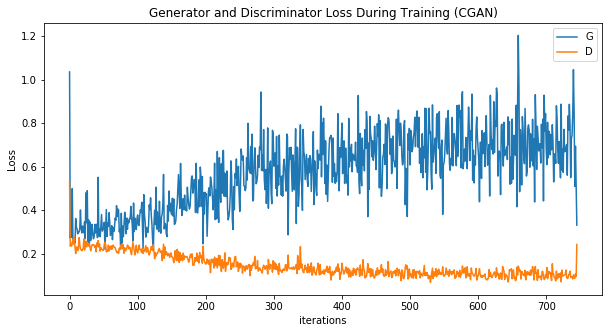

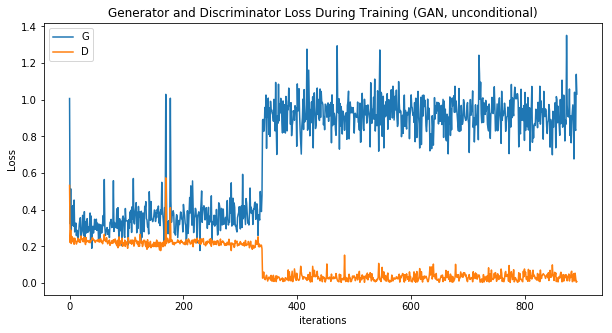

In [65]:
for f in ["loss.txt", "loss-unc.txt"]:
    G_losses = []
    D_losses = []
    with open(f, "r") as file:
        for i in file.readlines():
            a = i.split("\t")
            G_losses.append(float(a[0]))
            D_losses.append(float(a[1][:-1]))


    plt.figure(figsize=(10,5))
    if f=="loss.txt":
        plt.title("Generator and Discriminator Loss During Training (CGAN)")
    else:
        plt.title("Generator and Discriminator Loss During Training (GAN, unconditional)")
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    # D_losses